In [35]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Adjust path if needed
df = pd.read_csv("investor_profiles_cleaned.csv")

df.head()

,age,income_band,financial_knowledge,investment_experience,risk_preference,loss_aversion,investment_horizon_years,primary_goal,risk_profile
0,39,Medium,Low,Basic,Avoid risk,Very uncomfortable with losses,10,Aggressive growth,Conservative
1,33,Low,Medium,No experience,Avoid risk,Can accept small losses,5,Capital preservation,Conservative
2,41,Medium,Medium,No experience,Comfortable with some risk,Very uncomfortable with losses,5,Aggressive growth,Conservative
3,50,Medium,Medium,No experience,Comfortable with high risk,Can accept small losses,5,Capital preservation,Conservative
4,32,High,Medium,Advanced,Comfortable with some risk,Can accept small losses,15,Balanced growth,Moderate


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       4756 non-null   int64 
 1   income_band               4756 non-null   object
 2   financial_knowledge       4756 non-null   object
 3   investment_experience     4756 non-null   object
 4   risk_preference           4756 non-null   object
 5   loss_aversion             4756 non-null   object
 6   investment_horizon_years  4756 non-null   int64 
 7   primary_goal              4756 non-null   object
 8   risk_profile              4756 non-null   object
dtypes: int64(2), object(7)
memory usage: 334.5+ KB


In [38]:
# Target
y = df["risk_profile"]

# Features = everything except the target
X = df.drop(columns=["risk_profile"])

In [39]:
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Numeric:", numeric_features)
print("Categorical:", categorical_features)

Numeric: ['age', 'investment_horizon_years']
Categorical: ['income_band', 'financial_knowledge', 'investment_experience', 'risk_preference', 'loss_aversion', 'primary_goal']


In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y 
)

In [41]:
numeric_features = ["age", "investment_horizon_years"]

# These have a natural order
ordinal_features = [
    "investment_experience",
    "financial_knowledge",
    "loss_aversion",
    "risk_preference"
]

# These are purely nominal (no order)
nominal_features = [
    "income_band",
    "primary_goal"
]

print("Numeric:", numeric_features)
print("Ordinal:", ordinal_features)
print("Nominal:", nominal_features)

Numeric: ['age', 'investment_horizon_years']
Ordinal: ['investment_experience', 'financial_knowledge', 'loss_aversion', 'risk_preference']
Nominal: ['income_band', 'primary_goal']


In [42]:
for col in ordinal_features + nominal_features:
    print(f"\n{col}:")
    print(sorted(df[col].unique()))


investment_experience:
['Advanced', 'Basic', 'No experience']

financial_knowledge:
['High', 'Low', 'Medium']

loss_aversion:
['Can accept large swings', 'Can accept small losses', 'Very uncomfortable with losses']

risk_preference:
['Avoid risk', 'Comfortable with high risk', 'Comfortable with some risk']

income_band:
['High', 'Low', 'Medium']

primary_goal:
['Aggressive growth', 'Balanced growth', 'Capital preservation']


In [43]:
# Numeric features
numeric_features = ["age", "investment_horizon_years"]

# Ordinal features 
ordinal_features = [
    "investment_experience",
    "financial_knowledge",
    "loss_aversion",
    "risk_preference"
]

# Nominal features 
nominal_features = [
    "income_band",
    "primary_goal"
]

# Category order for each ordinal feature (lowest -> highest)
ordinal_mapping = [
    # investment_experience
    ["No experience", "Basic", "Advanced"],

    # financial_knowledge
    ["Low", "Medium", "High"],

    # loss_aversion  (low aversion -> high aversion)
    [
        "Can accept large swings",
        "Can accept small losses",
        "Very uncomfortable with losses"
    ],

    # risk_preference (least risk-taking -> most risk-taking)
    [
        "Avoid risk",
        "Comfortable with some risk",
        "Comfortable with high risk"
    ]
]

In [44]:
ordinal_encoder = OrdinalEncoder(categories=ordinal_mapping)
onehot_encoder = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", ordinal_encoder, ordinal_features),
        ("nominal", onehot_encoder, nominal_features),
        ("numeric", "passthrough", numeric_features)
    ]
)

rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", rf_clf)
    ]
)

In [45]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['No '
                                                                              'experience',
                                                                              'Basic',
                                                                              'Advanced'],
                                                                             ['Low',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Can '
                                                                              'accept '
                                                                              'large '
                                                                              'swings',
                                                                              'Can '
                                                                              'accept '
                                                                              'small '
                                                                              'losses',
                                                                              'Very '
                                                                              'uncomfortable '
                                                                              'with '
                                                                              'losses'],
                                                                             ['Avoid '
                                                                              'risk',
                                                                              'Comfortable '
                                                                              'with '
                                                                              'some '
                                                                              'risk',
                                                                              'Comfortable '
                                                                              'with '
                                                                              'high '
                                                                              'risk']]),
                                                  ['investment_experience',
                                                   'financial_knowledge',
                                                   'loss_aversion',
                                                   'risk_preference']),
                                                 ('nominal',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['income_band',
                                                   'primary_goal']),
                                                 ('numeric', 'passthrough',
                                                  ['age',
                                                   'investment_horizon_years'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [46]:
# Predictions on test set
y_pred = rf_pipeline.predict(X_test)

# Detailed metrics
print("Classification report:\n")
print(classification_report(y_test, y_pred))

Classification report:

              precision    recall  f1-score   support

  Aggressive       1.00      0.72      0.83        88
Conservative       0.97      0.89      0.93       278
    Moderate       0.91      0.99      0.95       586

    accuracy                           0.93       952
   macro avg       0.96      0.87      0.90       952
weighted avg       0.94      0.93      0.93       952



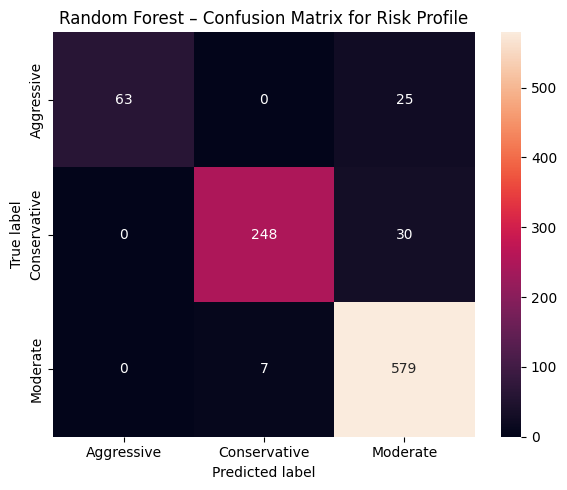

In [47]:
labels = sorted(y.unique())  # risk classes in consistent order

cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Random Forest – Confusion Matrix for Risk Profile")
plt.tight_layout()
plt.show()

In [48]:
custom_investor = pd.DataFrame([{
    "age": 29,
    "income_band": "Medium",
    "financial_knowledge": "Medium",
    "investment_experience": "Basic",
    "risk_preference": "Comfortable with some risk",
    "loss_aversion": "Can accept small losses",
    "investment_horizon_years": 15,
    "primary_goal": "Balanced growth"
}])

pred_class = rf_pipeline.predict(custom_investor)[0]
proba = rf_pipeline.predict_proba(custom_investor)[0]

print("Predicted risk profile:", pred_class)
print("\nClass probabilities:")
for cls, p in zip(rf_pipeline.classes_, proba):
    print(f"{cls}: {p:.3f}")

Predicted risk profile: Moderate

Class probabilities:
Aggressive: 0.005
Conservative: 0.000
Moderate: 0.995


In [49]:
custom_investor = pd.DataFrame([{
    "age": 62,
    "income_band": "Low",
    "financial_knowledge": "Low",
    "investment_experience": "No experience",
    "risk_preference": "Avoid risk",
    "loss_aversion": "Very uncomfortable with losses",
    "investment_horizon_years": 3,
    "primary_goal": "Capital preservation"
}])
pred_class = rf_pipeline.predict(custom_investor)[0]
proba = rf_pipeline.predict_proba(custom_investor)[0]

print("Predicted risk profile:", pred_class)
print("\nClass probabilities:")
for cls, p in zip(rf_pipeline.classes_, proba):
    print(f"{cls}: {p:.3f}")

Predicted risk profile: Conservative

Class probabilities:
Aggressive: 0.000
Conservative: 1.000
Moderate: 0.000


In [51]:
custom_investor = pd.DataFrame([{
    "age": 25,
    "income_band": "Low",
    "financial_knowledge": "Low",
    "investment_experience": "Advanced",
    "risk_preference": "Comfortable with high risk",
    "loss_aversion": "Can accept large swings",
    "investment_horizon_years": 20,
    "primary_goal": "Balanced growth"
}])
pred_class = rf_pipeline.predict(custom_investor)[0]
proba = rf_pipeline.predict_proba(custom_investor)[0]

print("Predicted risk profile:", pred_class)
print("\nClass probabilities:")
for cls, p in zip(rf_pipeline.classes_, proba):
    print(f"{cls}: {p:.3f}")

Predicted risk profile: Moderate

Class probabilities:
Aggressive: 0.240
Conservative: 0.025
Moderate: 0.735


In [52]:
import joblib

joblib.dump(rf_pipeline, "rf_risk_classifier.joblib")
print("Model saved.")

Model saved.
